<a href="https://colab.research.google.com/github/michaelengh/Project2/blob/main/09_Project2_Part4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [103]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Get data and file has no header row so i need to specify that within the load
df = pd.read_csv('/content/drive/MyDrive/**Coding Dojo**/08 Week 8: Gradient Boosting Algorithms/Files/adult.data.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


my target data will be the last column within the data that is the income of the record being over or under 50k

In [4]:
# Give columns headers from seperate data information file
df.columns = ['age',
              'workclass',
              'fnlwgt',
              'education',
              'education num',
              'marital status',
              'occupation',
              'relationship',
              'race',
              'sex',
              'capital gain',
              'capital loss',
              'hours per week',
              'native-country',
              'income']
df.head()

,age,workclass,fnlwgt,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
#drop unneeded columns
# column fnlwgt is unknown data to me even with information page
df.drop(columns = 'fnlwgt', inplace = True)
df.head()

,age,workclass,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
#get data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education num   32561 non-null  int64 
 4   marital status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital gain    32561 non-null  int64 
 10  capital loss    32561 non-null  int64 
 11  hours per week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  income          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [7]:
# looking for blank values
df.isna().sum()

age               0
workclass         0
education         0
education num     0
marital status    0
occupation        0
relationship      0
race              0
sex               0
capital gain      0
capital loss      0
hours per week    0
native-country    0
income            0
dtype: int64

In [8]:
df.duplicated().sum()

3465

In [9]:
# drop duplicated rows
df.drop_duplicates(inplace = True) 

In [10]:
# create a loop looking at all the different values within the object columns to verify inconsistancies
data_types = df.dtypes
data_types
obj_cols = data_types[data_types=='object']
obj_cols
obj_cols = obj_cols.index
for col in obj_cols:
  print(f"{col}:")
  print(df[col].value_counts(dropna=False))
  print("\n\n")

workclass:
 Private             19621
 Self-emp-not-inc     2473
 Local-gov            2040
 ?                    1632
 State-gov            1272
 Self-emp-inc         1091
 Federal-gov           946
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64



education:
 HS-grad         8886
 Some-college    6378
 Bachelors       4810
 Masters         1653
 Assoc-voc       1331
 11th            1056
 Assoc-acdm      1053
 10th             867
 7th-8th          629
 Prof-school      566
 9th              507
 12th             414
 Doctorate        402
 5th-6th          328
 1st-4th          166
 Preschool         50
Name: education, dtype: int64



marital status:
 Married-civ-spouse       13249
 Never-married             9173
 Divorced                  4237
 Separated                 1014
 Widowed                    982
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital status, dtype: int64



occupation:
 Prof-specialty       3885


In [11]:
# no missing values
# no inconsistancies within category values
# no outliers within data

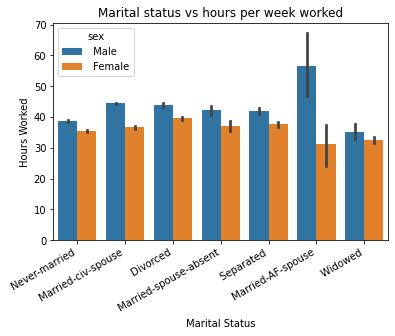

In [12]:
# barplot looking at hours worked vs maritial status for both sexes
sns.barplot(data=df, x='marital status', y='hours per week', hue='sex', );
plt.title('Marital status vs hours per week worked')
plt.ylabel('Hours Worked');
plt.xlabel('Marital Status');
plt.xticks(rotation=30);
plt.xticks(horizontalalignment='right');

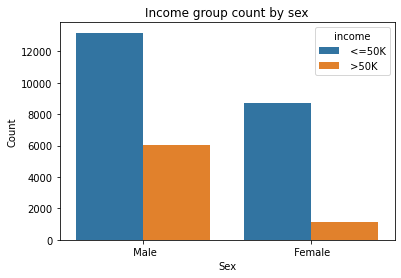

In [13]:
# ctreat a bar chart showing the count of records based off income split by sex
sns.countplot(data=df, x='sex', hue='income');
plt.title('Income group count by sex')
plt.ylabel('Count');
plt.xlabel('Sex');

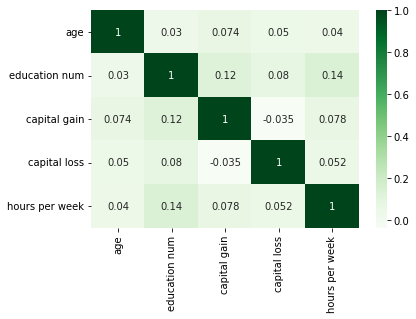

In [14]:
# create heat map
corr = df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

within my coorelation of the char columns the closest i can get to any coorelation is with the education column with the capital gain column and hours per week column. its a minimal coorelation but its the strongest ones i can see.  

# Part 3

In [15]:
df_num = df[['age', 'education num', 'capital gain', 'hours per week']]

In [16]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

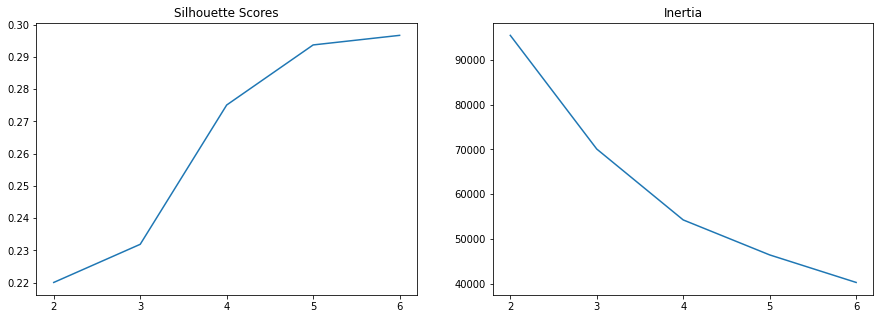

In [17]:
ks = range(2,7)
sils = []
inertias = []
for k in ks:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sils.append(silhouette_score(X_scaled, kmeans.labels_))
  inertias.append(kmeans.inertia_)

fig, axes = plt.subplots(1,2, figsize=(15,5))
axes[0].plot(ks, sils)
axes[0].set_title('Silhouette Scores')
axes[0].set_xticks(ks)
axes[1].plot(ks, inertias)
axes[1].set_title('Inertia')
axes[1].set_xticks(ks);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


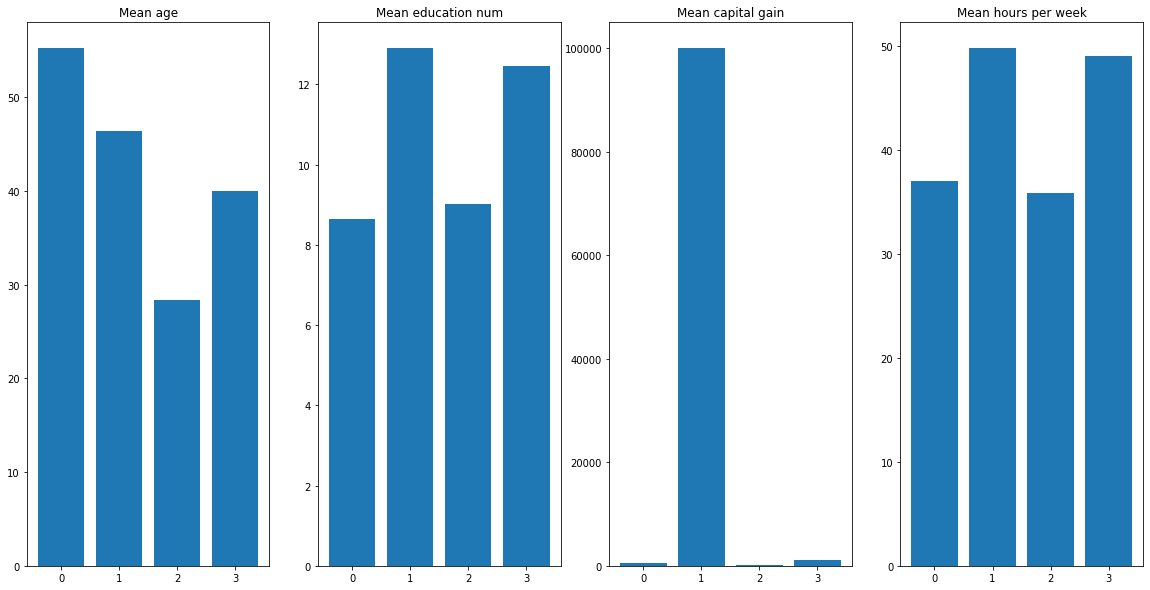

In [18]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_scaled)
df_num['cluster'] = kmeans.labels_

cluster_groups = df_num.groupby('cluster', as_index=False).mean()

fig, axes = plt.subplots(1,4, figsize = (20, 10))
axes = axes.ravel()
for i, col in enumerate(cluster_groups.columns[1:]):
  axes[i].bar(cluster_groups['cluster'], cluster_groups[col])
  axes[i].set_title(f'Mean {col}')

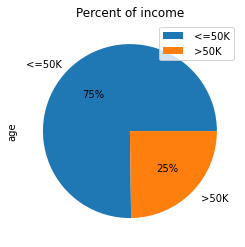

In [19]:
df.groupby(['income']).count().plot(kind='pie', y='age', autopct='%1.0f%%', 
                                title='Percent of income')

I can see by the 2 visualizations that 75% of all the recorded data the individual makes less than 50k a year. also I can see a coorelation that the higher the education level the average person has the more income that they are receiving and significantly have more capital gain compared to all other records. 

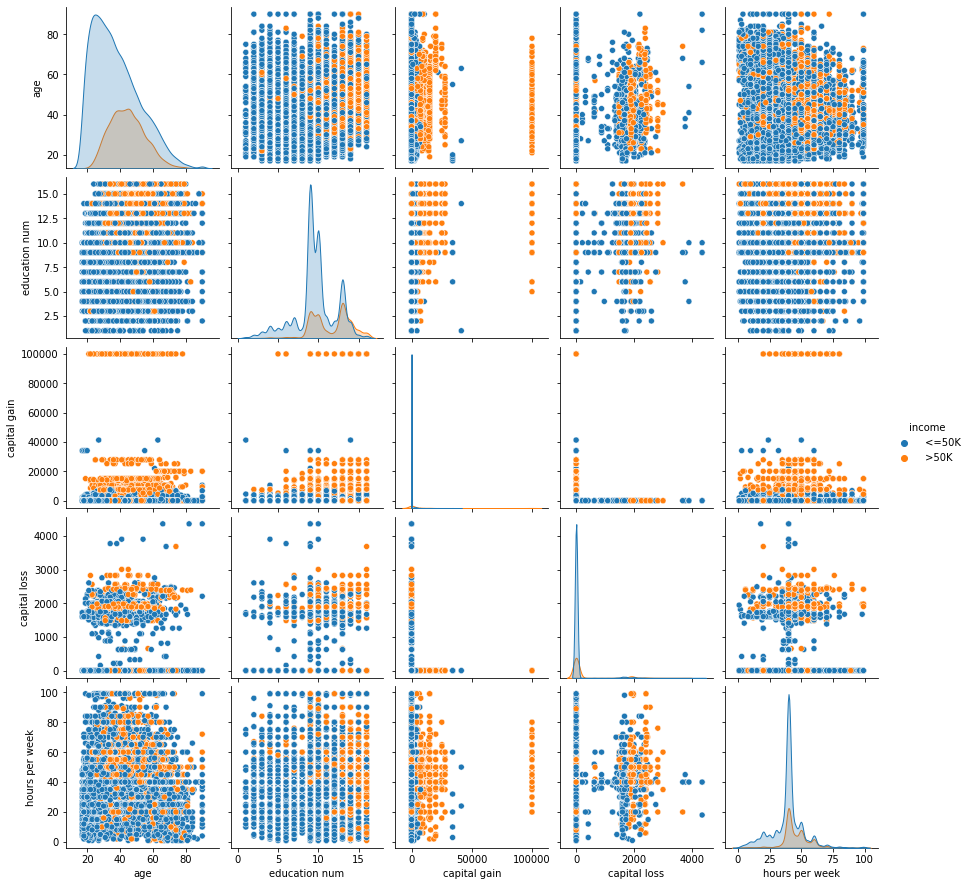

In [109]:
# create a pairplot showing coorelation
sns.pairplot(df, hue ='income')
plt.show()

In [21]:
df.head()

,age,workclass,education,education num,marital status,occupation,relationship,race,sex,capital gain,capital loss,hours per week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
df_scatter = df[['age','education num','hours per week','capital gain']]

<Figure size 1080x1080 with 0 Axes>

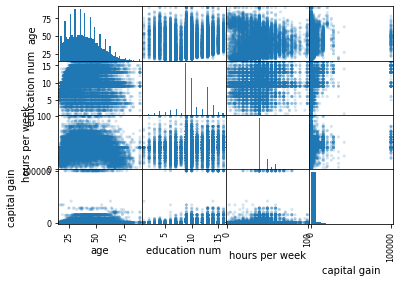

<Figure size 1080x1080 with 0 Axes>

In [110]:
# create scatterplot matrix showing coorelation
pd.plotting.scatter_matrix(df_scatter,hist_kwds={'bins':'auto'}, alpha=0.2)
plt.figure(figsize=(15, 15))

# KNN model

In [111]:
# create new df for KNN
df2 = df

In [112]:
# declare x y  and split
X = df2.drop(columns=['income'])
y = df2['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [113]:
# pull in scaler ohe and model type
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')
knn = KNeighborsClassifier(n_neighbors=20)

In [114]:
# grab object types
cat_sel = make_column_selector(dtype_include='object')
num_sel = make_column_selector(dtype_include='number')

In [115]:
# create tuples for scaler and ohe
num_tuple = (scaler, num_sel)
cat_tuple = (ohe, cat_sel)

In [116]:
# creat column transformer
col_transformer = make_column_transformer(num_tuple, cat_tuple, remainder = 'passthrough')

In [117]:
# create pipeline with knn
knn_pipe = make_pipeline(col_transformer,knn)

In [118]:
# fit knn and get score
knn_pipe.fit(X_train, y_train)
knn_score = knn_pipe.score(X_test, y_test)
knn_score

0.8406653835578773

# RandomForestClassifier

In [119]:
# instanciate RFC
rfc = RandomForestClassifier(random_state = 42)
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [120]:
# create rfc pipeline with col transformer
rfc_pipe = make_pipeline(col_transformer,rfc)

In [121]:
#fit to train
rfc_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f743fb5d210>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f743fb5d850>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [122]:
# get rfc scores
rfc_tr_score = rfc_pipe.score(X_train, y_train)
rfc_te_score = rfc_pipe.score(X_test, y_test)
print(rfc_tr_score)
print(rfc_te_score)

0.9840527907616167
0.8298047841627715


the model i choose is the K Nearest Neighbrs model. it was able to get a better score overall on the training data compared to the Random Forest Classifier model. 